# Monetary Movie Industry Analysis 

### Overview
This project is an analysis of the movie industry. More specifically analyzing the monetary success of films with respect to movie genres, release dates, and movie studios in the United States.  

### Business Problem
The business problem for this project is a report on the movie industry that will allow Microsoft producers to make informed decisions in the creation of their new movie studio. In the U.S., success can be described through monetary means. Thus given the available data sets, we can create new insights into how to maximize profits using 3 separate analyses. Through the data, we are able to see which movie genre has made the most profit, which month for a given movie release yields more profit, and which current studios have been most profitable.


## Analysis 1: Most Popular Movie Genre

### Data Understating
Using Pandas read_csv function we can read in the given file and assign variables to each file.

In [16]:
# Assign unique variables and read in files

df_04 = pd.read_csv('../imdb.title.basics.csv.gz')
df_07 = pd.read_csv('../imdb.title.ratings.csv.gz')

In [17]:
df_04.shape

(146144, 6)

In [18]:
df_07.shape

(73856, 3)

In [19]:
#Visualize the data

df_04.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
#Visualize the data

df_07.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Merging Data Sets
No prior data cleaning was required with this merge due to the tconst column. I initially wanted 
to use the tconst column as an index for later investigations. This merge was also a 1:1 merge due to the tconst column.

In [21]:
merge_01 = pd.merge(df_07,df_04)

In [22]:
merge_01.shape

(73856, 8)

In [23]:
# Merged visualization

merge_01.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [103]:
# After succesfully merging I export this new merge to a .csv file in my Processed folder

# merge_01.to_csv('../data/zippedData/Processed/merge1.csv')

## Data Cleaning 
For this new data set I start by dropping unnecessary columns and sorting by start year. 


In [24]:
# I will be using the Pandas lybrary for my data manipulation and analysis

import pandas as pd

# I will be importing the Matplotlib library for my ploting purposes

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
ds_01 =  pd.read_csv('merge1.csv')

In [26]:
ds_01.head()

,Unnamed: 0,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [27]:
# Drop unnecessary columns


dropped = ds_01.drop(['Unnamed: 0','tconst','averagerating','numvotes','primary_title','runtime_minutes'], axis=1)

In [28]:
# Using the Pandas sort function I sort by the start year column

dropped.sort_values(by='start_year', ascending=False)

,original_title,start_year,genres
0,Laiye Je Yaarian,2019,Romance
23991,"Out of Sight, Out of Mind",2019,Drama
24002,I Hate Kids,2019,Comedy
24012,Use Me,2019,Thriller
24028,Parningsmarknaden,2019,Documentary
...,...,...,...
36328,Taliya.Date.Com,2010,"Biography,Comedy,Documentary"
36325,Israel vs Israel,2010,Documentary
17412,Çok Filim Hareketler Bunlar,2010,Comedy
17411,Indiana Jones und der Speer des Schicksals,2010,"Action,Adventure"


In [33]:
# A unique list of years. To match Genre year count to. 

plt_x = []
plt_x.extend(dropped['start_year'].tolist())
years = []
[years.append(x)for x in plt_x if x not in years]

[None, None, None, None, None, None, None, None, None, None]

In [31]:
years

[2019, 2010, 2014, 2011, 2016, 2013, 2015, 2012, 2017, 2018]

In [32]:
# With this for loop I was able to accomplish several things. 
# In order to be able to plot which movie genre has the highest count. A new list of said counts is needed.
# Due to some movies having multiple genres. A filter was needed to only count movies with single genres.
# This new count was then transformed into a Pandas Data Frame
    

df = pd.DataFrame()
for year in years:
    
    genres = dropped.loc[dropped["start_year"].isin([year])]["genres"]
    dropped.groupby("genres")
    finalGenres = {}
    for genre in genres:
        if type(genre) == str:
            vals = genre.split(",")
            for val in vals:
                if(val in finalGenres):
                    finalGenres[val] = finalGenres[val]+1
                else:
                    finalGenres[val] = 1
    output = {"genres":[],"count":[]}
    for elem in finalGenres:
        output["genres"].append(elem)
        output["count"].append(finalGenres[elem])
    frame = pd.DataFrame(output)
    frame["year"]=year
    df  = df.append(frame) 

df.head()    

,genres,count,year
0,Romance,168,2019
1,Documentary,401,2019
2,Drama,900,2019
3,Thriller,261,2019
4,Action,204,2019


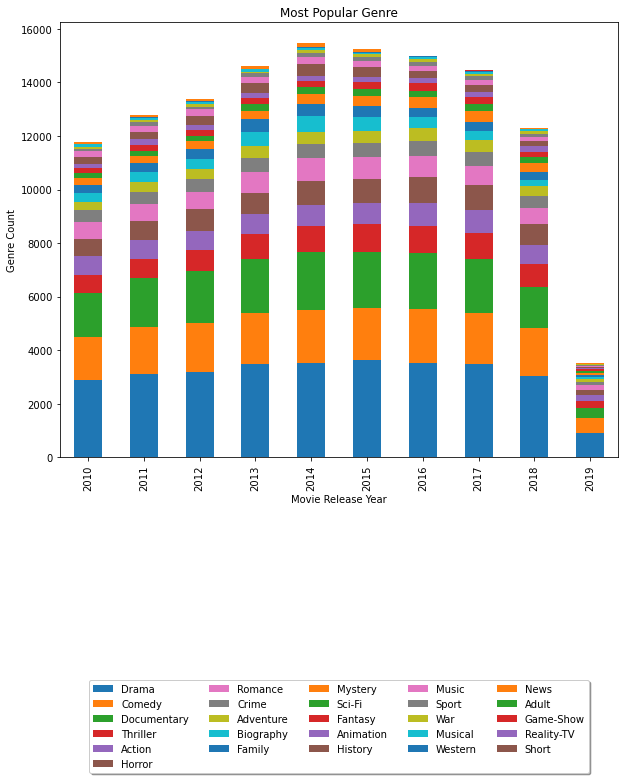

In [34]:
# Create plot

plot_1 = df.pivot(columns="genres", index="year", values="count").T.sort_values(by=[2019],ascending=False).T.plot(kind="bar", stacked=True, figsize = (10,8))

plt.legend(ncol=5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
         fancybox=True, shadow=True, ncol=5)

plt.xlabel("Movie Release Year")
plt.ylabel("Genre Count")
plt.title("Most Popular Genre")

plt.savefig('analysis_1.png')

## Analysis 
Taking the data from 2010 to 2019 a genre count by year was able to show which movie genres have been released the most. According to this, Drama, Comedy, and Documentary have had the highest count. 

# Analysis 2: Monetarily Successful Release Dates

### Data Understating

In [35]:
df_01 = pd.read_csv('../tn.movie_budgets.csv.gz')

In [36]:
# Visualize the data

df_01.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [37]:
# Show number of rows, columns

df_01.shape

(5782, 6)

## Data Cleaning
Drop unnecessary columns, convert to Pandas date, sort by date, apply custom function to remove commas and dollar signs, sort by domestic gross greater than 0, sort by date once again, and lastly create a new column of month values. 

In [38]:
plot_02 = df_01.drop(['id', 'movie','production_budget', 'worldwide_gross'], axis = 1)

In [39]:
df_01 = pd.read_csv('plot_02.csv')

In [40]:
df_01.head()

,Unnamed: 0,release_date,domestic_gross
0,0,"Dec 18, 2009","$760,507,625"
1,1,"May 20, 2011","$241,063,875"
2,2,"Jun 7, 2019","$42,762,350"
3,3,"May 1, 2015","$459,005,868"
4,4,"Dec 15, 2017","$620,181,382"


In [41]:
#Convert to Pandas datetime

sorted_datetime = df_01['release_date'] = pd.to_datetime(df_01.release_date)

In [42]:
# Sorting by release date

data = df_01.sort_values(by='release_date', ascending = True)

In [43]:
# This function removes the dollar signs and commas

def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

# The above function is called onto the desired column

data['domestic_gross'] = data['domestic_gross'].apply(clean_currency).astype('float')


In [44]:
# Sorted by greater than zero

data_01 = data[data.domestic_gross > 0]

In [45]:
# Sort once again 

data_02 = data_01.sort_values(by='release_date', ascending = True)

In [46]:
# Pull the month from the release date column and create a new months column

data_02['release_date'].dt.month
data_02['months'] = data_02['release_date'].dt.month
data_02.head()

,Unnamed: 0,release_date,domestic_gross,months
5677,5677,1915-02-08,10000000.0,2
5614,5614,1916-12-24,8000000.0,12
5683,5683,1920-09-17,3000000.0,9
5606,5606,1925-11-19,11000000.0,11
4569,4569,1925-12-30,9000000.0,12


In [47]:
data_02.shape

(5234, 4)

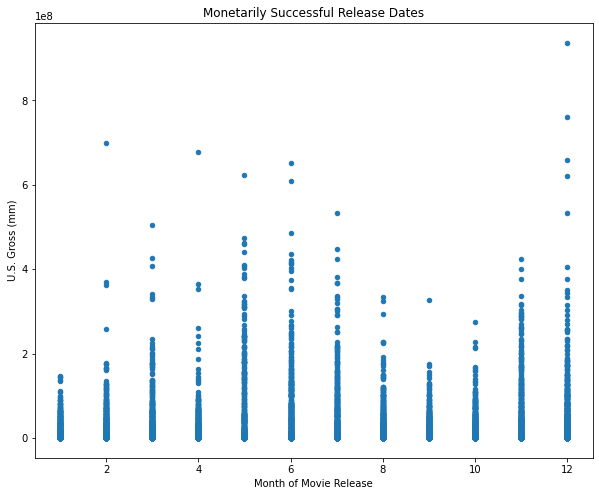

In [48]:
# Create Plot

data_02.plot(kind="scatter", x = 'months' , y = 'domestic_gross', figsize=(10, 8))

plt.xlabel("Month of Movie Release")
plt.ylabel("U.S. Gross (mm)")
plt.title("Monetarily Successful Release Dates")

plt.savefig('analysis_2.png')

## Analysis
Using the given data set after cleaning and sorting we end up with 5234 values for dates. Using this scatter plot we can see that 12 (December), and 6 (June) have been the most successful release dates. 

# Analysis 3: Top 50 most monetarily successful movie studios in the U.S.

## Data Understanding

In [49]:
df_0_1 = pd.read_csv('../bom.movie_gross.csv.gz')

In [50]:
df_0_1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [154]:
df_001 = pd.read_csv('third_graph')

## Data Cleaning
Drop unnecessary columns, sort by domestic gross, drop Nan values, and filter top 50 studios.

In [51]:
# Drop unnecessary columns

data_g = df_0_1.drop(['title','foreign_gross', 'year'], axis=1)

In [52]:
data_g.head()

,studio,domestic_gross
0,BV,415000000.0
1,BV,334200000.0
2,WB,296000000.0
3,WB,292600000.0
4,P/DW,238700000.0


In [54]:
# Sort by domestic gross

sorted1 = df_0_1.sort_values(by=['domestic_gross'], ascending=True)
sorted1.head()
sorted1.shape

(3387, 5)

In [55]:
# Remove Nan values

na = sorted1.dropna()

In [56]:
# Filter top 50

largest = na.nlargest(50,'domestic_gross')
largest.head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


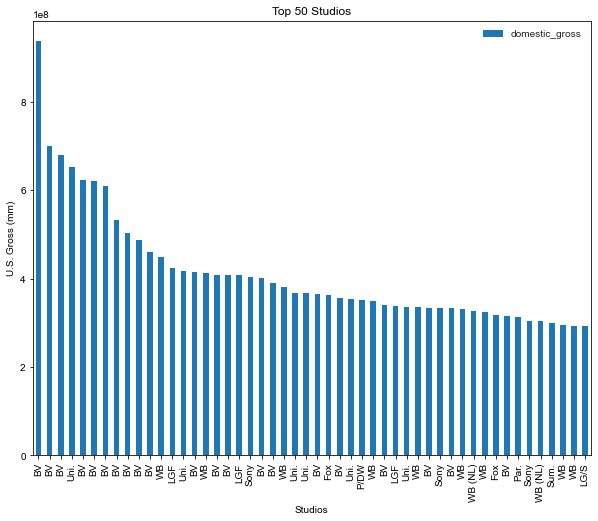

In [57]:
# Create Plot

largest.plot(kind = 'bar', y = 'domestic_gross' , x = 'studio', figsize = (10,8) )

plt.style.use('seaborn')
plt.legend()
plt.title('Top 50 Studios')
plt.xlabel("Studios")
plt.ylabel("U.S. Gross (mm)")

plt.savefig('analysis_3.png')

## Analysis
Given this data and filtering by the top 50 studios. We can see that BV (Buena Vista), and UNI (Universal) studios have been the most profitable in the U.S.

## Conclusions

A successful film in the U.S. is one that yields maximum profits.

Thus given these analyses, 3 recommendations can be made:

1. In order to maximize revenue a studio should consider making movies within in the Drama, Comedy, and Documentary genres.

2. In order to maximize revenue a studio should consider releasing films in either December or June.

3. In order to maximize revenue a new studio should consider doing further research into Buena Vista and Universal Studios. In order to understand why these studios have been more successful than other studios in the U.S.

## Next Steps
Further analysis could produce more accurate and current insights:

* Merging more data sets could yield more accurate information
* Design a new label for movies with multiple genres. Yielding more data, rather than dropping movies with multiple genres. 
* New investigation into what specifically made the top 50 studios more successful than other studios in the U.S.